# Task 3.1 random walk

In [7]:
from igraph import Graph, plot
import igraph as ig
import random
ig.config["plotting.backend"] = "matplotlib"

In [210]:
def random_walk(graph, start_node, num_iterations):
    """
    隨機游走模擬。
    參數：
        graph: iGraph 的 Graph 對象
        start_node: 隨機游走的起始節點
        num_iterations: 總共的游走步數
    返回：
        counter: 每個節點的訪問次數（字典形式）
    """
    # 初始化所有節點的訪問計數器
    counter = {v.index: 0 for v in graph.vs}
    

    # 特別處理起始點
    if len(graph.neighbors(start_node))==0:  # 如果起始點沒有鄰居
        # 可以直接返回結果，因為無法進行隨機漫步
        counter[start_node] =  0  ####
        path=[start_node]
        print("Starting point doesn't has any neighbor.")
        
        return counter,path
    
    # 起始節點
    current_node = start_node
    counter[current_node] += 1  # 起始節點計數+1

    ## test(comment it to run faster)
    #path=[]
    #path.append(start_node)
    ## test(comment it to run faster)

    for _ in range(num_iterations):
        
        # 獲取當前節點的鄰居
        neighbors = graph.neighbors(current_node)
               
        
        # 隨機選擇下一個節點
        next_node = random.choice(neighbors)

        ## test(comment it to run faster)
        #path.append(next_node)
        ## test(comment it to run faster)


        
        # 更新計數器和當前節點
        counter[next_node] += 1
        current_node = next_node

    ## test(comment it to run faster)
    #print (f"Path: {path}, , Total number of visit: {len(path)}")
    ## test(comment it to run faster)

    return counter

In [212]:
g_retweet = ig.Graph.Read("filtered_retweet_network.pickle", format="pickle")

#g_reply = ig.Graph.Read("filtered_reply_network.pickle", format="pickle")

num_iterations = 10000  # 游走步數
start_node = 0  # 起始節點 #7當起始點 沒有鄰居
result = random_walk(g_retweet, start_node, num_iterations)

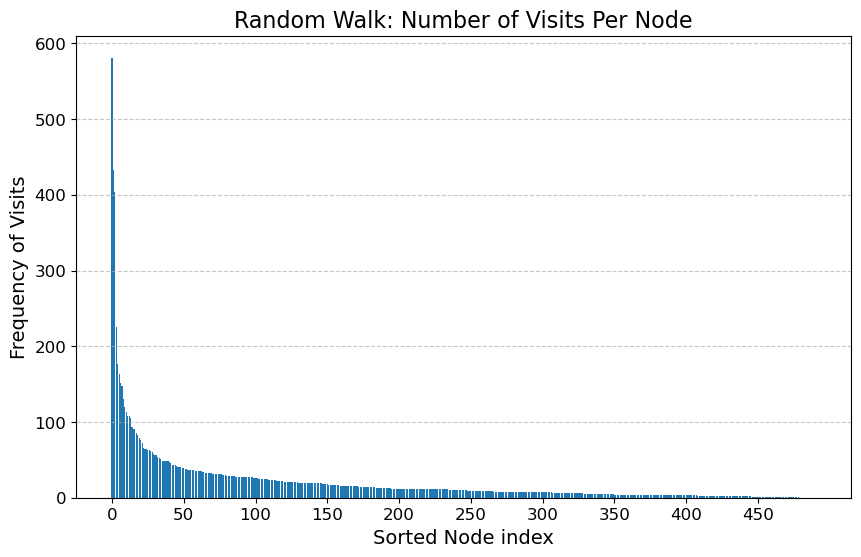

In [216]:
import matplotlib.pyplot as plt
# 將訪問次數轉換為列表
nodes = list(result.keys())
visit_counts = list(result.values())

sorted_pairs = sorted(zip(nodes, visit_counts), key=lambda x: x[1], reverse=True)
nodes_sorted = [x[0] for x in sorted_pairs]
visits_sorted = [x[1] for x in sorted_pairs]

# 視覺化
plt.figure(figsize=(10, 6))
plt.bar(nodes, visits_sorted)
plt.xlabel("Sorted Node index", fontsize=14)
plt.ylabel("Frequency of Visits", fontsize=14)
plt.title("Random Walk: Number of Visits Per Node", fontsize=16)
plt.xticks(nodes[::50], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("task 3.1 retweet.png")
plt.show()

# Task 3.2 Information diffusion 

In [218]:
import random
from igraph import Graph

def simulate_information_diffusion(graph, start_node, num_iterations, beta):
    """
    模擬資訊傳播過程。
    參數：
        graph: iGraph 的 Graph 對象
        start_node: 資訊傳播的起始節點
        num_iterations: 總的迭代次數
        beta: 傳播的概率（0-1）
    返回：
        每次迭代中處於 "+" 狀態的節點數列表
    """
    # 初始化所有節點狀態為 "-"
    states = {v.index: "-" for v in graph.vs}
    states[start_node] = "+"  # 起始節點設為 "+"
    
    plus_state=[start_node] ##
    

    
    for i in range(num_iterations):
        # 建立當前狀態的拷貝，避免在同一輪中即時更新影響結果
        new_states = states.copy()
        
        # 遍歷所有處於 "+" 狀態的節點
        for node, state in states.items():
            if state == "+":
                # 傳播給鄰居
                neighbors = graph.neighbors(node)
                for neighbor in neighbors:
                    # 如果鄰居尚未收到資訊，以概率 beta 傳播資訊
                    if states[neighbor] == "-" and random.random() < beta:
                        new_states[neighbor] = "+"

                        ## test(comment it to run faster)
                        
                        #if neighbor not in plus_state: ##
                        #    plus_state.append(neighbor) ## 
                        
                        ## test(comment it to run faster)
        
        # 更新節點狀態
        states = new_states
        
    
    return list(states.values()).count("+")

In [226]:
g_retweet = ig.Graph.Read("filtered_retweet_network.pickle", format="pickle")

num_iterations = 10  # 游走步數
start_node = 0  # 起始節點
beta = 0.05
diffusion_results = simulate_information_diffusion(g_retweet, start_node, num_iterations, beta)

print("function output: ", diffusion_results, "out of", g_retweet.vcount())

function output:  462 out of 491


# Task 3.3: opinion diffusion process

In [205]:
import random
from igraph import Graph

def simulate_opinion_diffusion(graph, initial_positive_count, num_iterations, threshold):
    """
    模擬意見傳播過程。
    參數：
        graph: iGraph 的 Graph 對象
        initial_positive_count: 初始設定為 "+" 意見的節點數
        num_iterations: 傳播的總迭代次數
        threshold: 意見轉變的閾值（0-1）
    返回：
        每次迭代 "+" 意見的節點數列表
    """
    # 初始化所有節點的意見為 "-"
    states = {v.index: "-" for v in graph.vs}

    # 隨機選擇一些節點的意見設為 "+"
    initial_positive_nodes = random.sample(range(graph.vcount()), initial_positive_count)
    for node in initial_positive_nodes:
        states[node] = "+"

    # 記錄每次迭代中 "+" 狀態的節點數

    for i in range(num_iterations):
        # 建立當前狀態的拷貝，避免即時更新影響結果
        new_states = states.copy()

        # 遍歷所有節點
        for node in graph.vs:
            # 如果節點當前是 "+"，則檢查是否需要轉變為 "-"
            if states[node.index] == "+":
                neighbors = graph.neighbors(node.index)
                if not neighbors:  # 無鄰居時跳過
                    continue
                # 計算鄰居中 "-" 的比例
                negative_neighbors = sum(1 for neighbor in neighbors if states[neighbor] == "-")
                total_neighbors = len(neighbors)
                negative_ratio = negative_neighbors / total_neighbors

                # 如果 "-" 鄰居的比例大於等於閾值，改變為 "-"
                if negative_ratio >= threshold:
                    new_states[node.index] = "-"
        
        ## 打印結果 test(comment it to run faster)
        #plus_state = list(filter(lambda x: states[x] == '+', states)) # 記錄當前 "+" 意見的節點數
        #print(f"Iteration {i}: {len(plus_state)} nodes are in the '+' state, including: {plus_state}")
        ## 打印結果 test(comment it to run faster)

        # 更新節點狀態
        states = new_states
        
   

    return list(states.values()).count("+") 

In [207]:
# 測試意見傳播模擬函數
g_retweet = ig.Graph.Read("filtered_retweet_network.pickle", format="pickle")
initial_positive_count = 100  # 初始為 "+" 的節點數
num_iterations = 100  # 傳播的迭代次數
threshold = 0.9  # 意見轉變的閾值

# 執行意見傳播模擬
opinion_results = simulate_opinion_diffusion(g_retweet, initial_positive_count, num_iterations, threshold)
print("\n")

print("function output: ",opinion_results)



function output:  19
